## **Curso de Especialização em Inteligência Artificial e Computacional** 
**ELT 574 - Aprendizado de Máquinas**

**Aluna:** Carine Madeira Soares  
**Instituição:** Universidade Federal de Viçosa

### Semana 3 - Redes Neurais Artificiais

In [41]:
# importando as bibliotecas
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap

print('Setup completo!')

Setup completo!


#### Aula 01 e 02 - Adaline e Regra Delta e Rede Perceptron Multicamadas

##### Perceptron

Vamos classificar as flores de acordo com a espécie apartir de um perceptro, mais especificamente por uma adaline

In [3]:
iris = datasets.load_iris()

In [8]:
# Setosa = 0 e Versicolor = 1 
X = iris['data'][:, (2, 3)][(iris['target']==0)|(iris['target']==1)]
y = iris['target'][(iris['target']==0)|(iris['target']==1)]

#### Aula 03 - Aspectos sobre Treinamento de Redes Neurais

In [20]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)
print('Perceptron treinado!')
print('Os pesos encontrados foram {} e o bias foi {}.'.format(per_clf.coef_, per_clf.intercept_))

y_pred = per_clf.predict([[2, 0.5]])
y_pred # Setosa = 0 e Versicolor = 1 

Perceptron treinado!
Os pesos encontrados foram [[1.5 2.2]] e o bias foi [-5.].


array([0])

In [26]:
per_clf = Perceptron(max_iter=2000, tol=1e-3)
#max_iter = epoca_max; tol = limiar de precisao
per_clf.fit(X, y)
print('Perceptron treinado!')
print('Os pesos encontrados foram {} e o bias foi {}.'.format(per_clf.coef_, per_clf.intercept_))

a = -per_clf.coef_[0][0]/ per_clf.coef_[0][1]
b = -per_clf.intercept_/ per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

Perceptron treinado!
Os pesos encontrados foram [[0.9 1.7]] e o bias foi [-3.].


In [33]:
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)

In [37]:
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

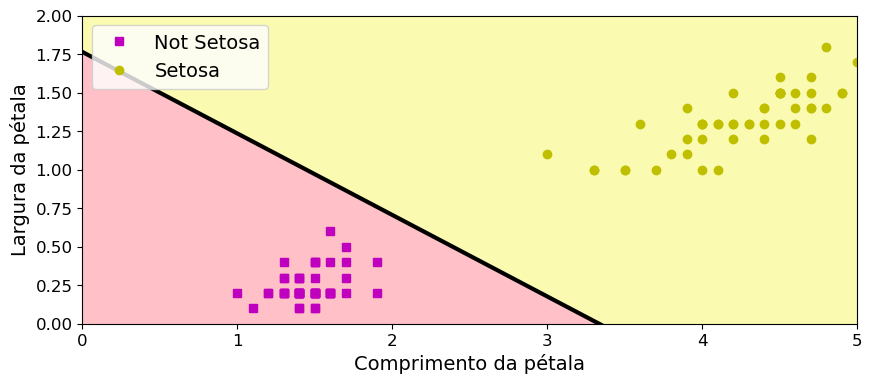

In [54]:
custom_cmap = ListedColormap(['#ffc0c8', '#fafab0'])

plt.figure(figsize=(10,4))
plt.plot(X[y==0, 0], X[y==0, 1], 'ms', label='Not Setosa')
plt.plot(X[y==1, 0], X[y==1, 1], 'yo', label='Setosa')
plt.plot([axes[0], axes[1]], [a*axes[0]+b, a*axes[1]+b], 'k-', linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel('Comprimento da pétala', fontsize=14)
plt.ylabel('Largura da pétala', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.axis(axes)

plt.show()